In [ ]:
!pip install nltk
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob

In [ ]:
# Loading data set
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/amazon_reviews.csv")
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In [ ]:
df= data.drop(['reviewerID','asin','reviewerName','helpful','summary','unixReviewTime','reviewTime','day_diff','helpful_yes','total_vote'], axis=1)
df.head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In the first step of our NLP project, we converted the comments in the 'reviewText' column to lowercase. This standardizes the data into a uniform format, eliminating inconsistencies that might arise from differences in case sensitivity during the text processing phase.

In [ ]:
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText']

,reviewText
0,no issues.
1,"purchased this for my device, it worked as adv..."
2,it works as expected. i should have sprung for...
3,this think has worked out great.had a diff. br...
4,"bought it with retail packaging, arrived legit..."
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable. it ...
4913,good amount of space for the stuff i want to d...


In this step, we removed punctuation marks from the comments in the 'reviewText' column. This process aims to enhance the efficiency of our language processing tasks by making our text data cleaner and more suitable for analysis.

In [ ]:
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '', regex=True)
df['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...
...,...
4910,i bought this sandisk 16gb class 10 to use wit...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...


In this step, we removed numerical characters from the comments in the 'reviewText' column. By eliminating numbers from the text, this process enables us to focus more on our language processing and text analysis tasks. Consequently, we can concentrate solely on the textual content, allowing for cleaner and more meaningful data analysis.

In [ ]:
df['reviewText'] = df['reviewText'].str.replace('\d', '', regex=True)
df['reviewText']

,reviewText
0,no issues
1,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...
...,...
4910,i bought this sandisk gb class to use with my...
4911,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...


In this section, by removing frequently repeated and often meaningless words (such as 'the', 'is', 'in') from our texts, we can focus our analysis on more meaningful words. This allows us to better understand the essence of the comments and make our NLP processes more efficient.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw = stopwords.words('english')
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df['reviewText']

,reviewText
0,issues
1,purchased device worked advertised never much ...
2,works expected sprung higher capacity think ma...
3,think worked greathad diff bran gb card went s...
4,bought retail packaging arrived legit orange e...
...,...
4910,bought sandisk gb class use htc inspire months...
4911,used extending capabilities samsung galaxy not...
4912,great card fast reliable comes optional adapte...
4913,good amount space stuff want fits gopro say


In this step, we first combined all comments in the 'reviewText' column, then split the resulting text into words and calculated the frequency of each word. As a result of this process, we identified words that only appear once. Subsequently, we removed these rarely used words from the comments in the 'reviewText' column. This process helps in eliminating words with low semantic weight and frequency in our texts, thereby allowing our NLP analyses to focus on more significant words.

In [ ]:
temp_df = pd.Series(' '.join(df['reviewText']).split()).value_counts()
temp_df

,count
card,4603
gb,1725
phone,1685
works,1559
great,1445
...,...
outmoded,1
stocking,1
cardsso,1
requirement,1


In [ ]:
drops = temp_df[temp_df <= 1]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

**Tokenization** - In this part, we transformed each comment in the 'reviewText' column into a TextBlob object and then tokenized them into words. TextBlob allows us to easily split comments into processable tokens (words). This process enables us to examine the words in each comment individually and conduct more detailed NLP analyses based on these words.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from textblob import download_corpora
download_corpora.download_all()


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

,reviewText
0,[issues]
1,"[purchased, device, worked, advertised, never,..."
2,"[works, expected, higher, capacity, think, mad..."
3,"[think, worked, gb, card, went, south, one, he..."
4,"[bought, retail, packaging, arrived, legit, en..."


**Lemmitization-** In this step, we lemmatized each word in the comments of the 'reviewText' column to obtain their root forms (basic forms). Lemmatization reduces different inflected forms of words (like 'running' to 'run') to their base form. This provides a more consistent and meaningful data processing opportunity in our NLP analyses.

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['reviewText']

,reviewText
0,issue
1,purchased device worked advertised never much ...
2,work expected higher capacity think made bit e...
3,think worked gb card went south one held prett...
4,bought retail packaging arrived legit envelope...
...,...
4910,bought sandisk gb class use htc inspire month ...
4911,used capability samsung galaxy note greatly ex...
4912,great card fast reliable come optional adapter...
4913,good amount space stuff want fit gopro say


**Text Visualization: Calculation of Term Frequencies-** In this step, we calculated the frequencies (tf, or term frequency) of all words in the comments of the 'reviewText' column. We separated the words in each comment, determined how many times each word appeared in that comment, and summed these numbers. Then, we converted these frequencies into a DataFrame and named the columns 'words' and 'tf'. Finally, we sorted this DataFrame in descending order of 'tf' values. This process helps us identify the most frequently used words in the comments and how prevalent they are, allowing us to visualize and analyze the most significant terms in our dataset.

In [ ]:
filterwarnings('ignore')
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ['words', 'tf']
tf_sorted = tf.sort_values(by='tf', ascending=False)
tf_sorted

,words,tf
27,card,5537.0
14,work,2044.0
7,phone,1909.0
28,gb,1756.0
91,great,1445.0
...,...,...
2959,itd,2.0
2960,contain,2.0
2963,sanddisk,2.0
1756,sharing,2.0


**Bar plot-** In this step, based on the previously calculated term frequencies (tf), we filtered words with a frequency of more than 500. Then, we visualized the frequencies of these words using a bar graph. The graph's x-axis represents the words, and the y-axis shows the total number of times these words appear in the comments (tf). This visualization clearly reveals the most frequently encountered words in our dataset and their prevalence, enabling us to better understand the key trends and patterns in our text data.

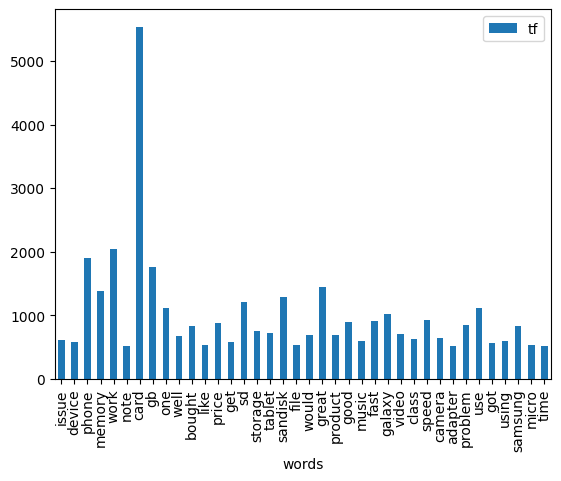

In [ ]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show(block=True)

**Sentiment Analysis**- In this section, we will perform sentiment analysis on our text data. We will evaluate the emotional expressions in the texts using mathematical methods to determine whether these texts are generally positive, negative, or neutral in sentiment. This allows us to express the sentiment of the texts in numerical values, enabling a more objective and measurable analysis.
.................SIA provides polarity scores indicating how positive, neutral, or negative a piece of text is. The "compound" score is a single metric summarizing the overall sentiment, ranging from -1 (most negative) to +1 (most positive).

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [ ]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

,reviewText
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
3,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp..."
4,"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.108, 'neu': 0.598, 'pos': 0.295, 'co..."
7,"{'neg': 0.077, 'neu': 0.65, 'pos': 0.272, 'com..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp..."


In [ ]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

,reviewText
0,0.0000
1,0.0000
2,0.4019
3,0.6486
4,0.8591
5,0.0000
6,0.8678
7,0.8221
8,0.0000
9,0.9167


In [ ]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,reviewText,overall,polarity_score
0,issue,4.0,0.0000
1,purchased device worked advertised never much ...,5.0,0.0000
2,work expected higher capacity think made bit e...,4.0,0.4019
3,think worked gb card went south one held prett...,5.0,0.6486
4,bought retail packaging arrived legit envelope...,5.0,0.8591


**Feature Engineering-** In this section, sentiment analysis is conducted to determine the emotional tone of the texts, and each comment is labeled as 'positive' (pos) or 'negative' (neg) based on its compound sentiment score. Subsequently, we examine the distribution of these sentiment labels in the dataset and their relationship with overall rating scores. Finally, we convert these sentiment labels into numerical values for use in machine learning models. These steps help us extract meaningful features from our text data, preparing it for further analysis and modeling stages.

In [ ]:
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

,reviewText
0,neg
1,neg
2,pos
3,pos
4,pos
5,neg
6,pos
7,pos
8,neg
9,pos


In [ ]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head()

,reviewText,overall,polarity_score,sentiment_label
0,issue,4.0,0.0000,neg
1,purchased device worked advertised never much ...,5.0,0.0000,neg
2,work expected higher capacity think made bit e...,4.0,0.4019,pos
3,think worked gb card went south one held prett...,5.0,0.6486,pos
4,bought retail packaging arrived legit envelope...,5.0,0.8591,pos


In [ ]:
df["sentiment_label"].value_counts()

,count
sentiment_label,
pos,3944
neg,971


In [ ]:
df.groupby("sentiment_label")["overall"].mean()

,overall
sentiment_label,
neg,4.094748
pos,4.708925


In [ ]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])
df.head()

,reviewText,overall,polarity_score,sentiment_label
0,issue,4.0,0.0000,0
1,purchased device worked advertised never much ...,5.0,0.0000,0
2,work expected higher capacity think made bit e...,4.0,0.4019,1
3,think worked gb card went south one held prett...,5.0,0.6486,1
4,bought retail packaging arrived legit envelope...,5.0,0.8591,1


In [ ]:
y = df["sentiment_label"] # dependent variable
X = df["reviewText"] # independent variable

In [ ]:
from sklearn.model_selection import train_test_split

# X is your list/array/Series of text samples
# y is your target variable (e.g., sentiment/label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**(a) Count Vectors -** In this section, the texts in the 'reviewText' column are transformed into numerical vectors using the CountVectorizer method. During this transformation process, the frequency of each word in the texts is calculated, and these frequencies are used to convert each text into a numerical vector. This step is critical for transforming text data into a suitable format for use in machine learning models. This numerical representation of texts facilitates the extraction of significant features and efficient processing of data during the modeling process.

**Word Frequency**

In [ ]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accessible', 'accessing', 'accessory'],
      dtype=object)

In [ ]:
X_train_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**N-Gram Frequency**

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_train_n = vectorizer2.fit_transform(X_train)
X_test_n = vectorizer2.transform(X_test)
vectorizer2.get_feature_names_out()[10:15]

array(['ability stick', 'ability store', 'able access', 'able add',
       'able address'], dtype=object)

**(b) TF-IDF**

**Word**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_word_vectorizer = TfidfVectorizer()
X_train_word = tf_idf_word_vectorizer.fit_transform(X_train)
X_test_word = tf_idf_word_vectorizer.transform(X_test)

**N-Gram**

In [ ]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_train_ngram = tf_idf_ngram_vectorizer.fit_transform(X_train)
X_test_ngram = tf_idf_ngram_vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

# -- For count word frequency ---
lr.fit(X_train_count, y_train)
y_pred_word1 = lr.predict(X_test_count)

# -- For count word frequency ---
lr.fit(X_train_n, y_train)
y_pred_ngram1 = lr.predict(X_test_n)

# -- For TF-IDF word-level --
lr.fit(X_train_word, y_train)
y_pred_word2 = lr.predict(X_test_word)

# -- For TF-IDF ngram-level --
lr.fit(X_train_ngram, y_train)
y_pred_ngram2 = lr.predict(X_test_ngram)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Word-level Count logistic regression:")
print(accuracy_score(y_test, y_pred_word1))
print(classification_report(y_test, y_pred_word1))

print("Ngram-level Count logistic regression:")
print(accuracy_score(y_test, y_pred_ngram1))
print(classification_report(y_test, y_pred_ngram1))

print("Word-level TF-IDF logistic regression:")
print(accuracy_score(y_test, y_pred_word2))
print(classification_report(y_test, y_pred_word2))

print("Ngram-level TF-IDF logistic regression:")
print(accuracy_score(y_test, y_pred_ngram2))
print(classification_report(y_test, y_pred_ngram2))

Word-level Count logistic regression:
0.8524923702950152
              precision    recall  f1-score   support

           0       0.73      0.53      0.61       217
           1       0.88      0.95      0.91       766

    accuracy                           0.85       983
   macro avg       0.80      0.74      0.76       983
weighted avg       0.84      0.85      0.84       983

Ngram-level Count logistic regression:
0.7884028484231943
              precision    recall  f1-score   support

           0       0.74      0.06      0.12       217
           1       0.79      0.99      0.88       766

    accuracy                           0.79       983
   macro avg       0.76      0.53      0.50       983
weighted avg       0.78      0.79      0.71       983

Word-level TF-IDF logistic regression:
0.8168870803662258
              precision    recall  f1-score   support

           0       0.91      0.19      0.31       217
           1       0.81      0.99      0.89       766

    accur

In [ ]:
# Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_count, y_train)
y_pred_rf = rf.predict(X_test_count)

print("Word-level Count Random Forest:")
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Word-level Count Random Forest:
0.8158697863682605
              precision    recall  f1-score   support

           0       0.80      0.22      0.35       217
           1       0.82      0.98      0.89       766

    accuracy                           0.82       983
   macro avg       0.81      0.60      0.62       983
weighted avg       0.81      0.82      0.77       983



In [ ]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation:
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_cv, X_train_count, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracies:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(100 * cv_scores.mean()))

Cross-Validation Accuracies: [0.84243964 0.83100381 0.84351145 0.83333333 0.83206107]
Mean CV Accuracy: 83.65%


# **LSTM**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000  # Vocabulary size (adjust as needed)
max_len = 100      # Max review length (adjust as needed)

# Fit the Tokenizer on your training texts
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for equal length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64),         # You can add more layers or units if needed
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use 'softmax' and more units for multi-class
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,        # You may increase for better results
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7962 - loss: 0.5207 - val_accuracy: 0.7792 - val_loss: 0.5289
Epoch 2/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8090 - loss: 0.4933 - val_accuracy: 0.7792 - val_loss: 0.5283
Epoch 3/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8095 - loss: 0.4906 - val_accuracy: 0.7792 - val_loss: 0.5306
Epoch 4/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8129 - loss: 0.4861 - val_accuracy: 0.7792 - val_loss: 0.5309
Epoch 5/5
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8094 - loss: 0.4884 - val_accuracy: 0.7792 - val_loss: 0.5340


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7828 - loss: 0.5279
Test Accuracy: 0.7792472243309021
